# `Hypothesis Testing`

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("Social_Network_Ads.csv")

In [14]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
data.drop(["User ID"],axis=1,inplace=True)

In [16]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# `Chisquare test ------------------------`

In [17]:
two_fre_table = pd.crosstab(data["Gender"],data["Purchased"])
two_fre_table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [18]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_fre_table)

In [19]:
p_value # p> 0.05 I will accepted the null hypothesis 

0.45624659183130645

In [20]:
data.drop(["Gender"],axis=1,inplace=True)

# `T-test -----------------------------------` 

In [21]:
grp0 = data.loc[data["Purchased"]==0,"Age"]
grp1 = data.loc[data["Purchased"]==1,"Age"]

<AxesSubplot:xlabel='Age', ylabel='Density'>

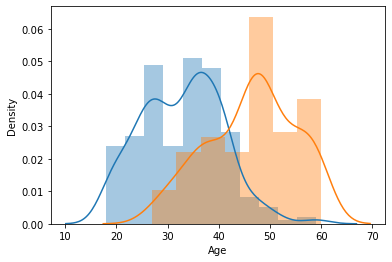

In [22]:
import seaborn as sns
sns.distplot(grp0)
sns.distplot(grp1)

In [23]:
from scipy.stats import ttest_ind
#Ho -> Variable are independent or not associated (Mean are similar)
#H1 -> Varibale are dependent or related (Mean are not similar)
ttest_ind(grp0,grp1)

Ttest_indResult(statistic=-15.86638147378889, pvalue=2.800233943272422e-44)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

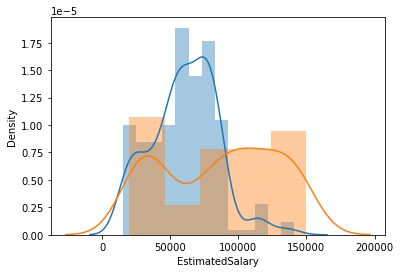

In [24]:
grp0 = data.loc[data["Purchased"]==0,"EstimatedSalary"]
grp1 = data.loc[data["Purchased"]==1,"EstimatedSalary"]

sns.distplot(grp0)
sns.distplot(grp1)

In [14]:
#Ho -> Variable are independent or not associated (Mean are similar)
#H1 -> Varibale are dependent or related (Mean are not similar)
ttest_ind(grp0,grp1)

Ttest_indResult(statistic=-7.7493599219079, pvalue=7.772785450066969e-14)

In [15]:
import plotly.express as px
px.scatter(y=data["EstimatedSalary"],x=data["Age"],color=data["Purchased"].astype("category"))

TypeError: scatter() missing 1 required positional argument: 'data_frame'

<AxesSubplot:ylabel='Frequency'>

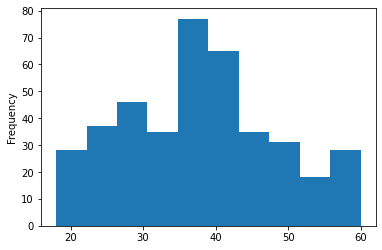

In [16]:
data["Age"].plot.hist()

In [17]:
data["Age_binned"] = pd.cut(data["Age"],bins=5)
data["EstimatedSalary_binned"] = pd.cut(data["EstimatedSalary"],bins=5)

In [18]:
data["Age_binned"]

0      (17.958, 26.4]
1        (34.8, 43.2]
2      (17.958, 26.4]
3        (26.4, 34.8]
4      (17.958, 26.4]
            ...      
395      (43.2, 51.6]
396      (43.2, 51.6]
397      (43.2, 51.6]
398      (34.8, 43.2]
399      (43.2, 51.6]
Name: Age_binned, Length: 400, dtype: category
Categories (5, interval[float64]): [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

In [20]:
heat  = data.pivot_table(index="Age_binned",columns="EstimatedSalary_binned",values="Purchased",aggfunc="sum")

In [21]:
heat

EstimatedSalary_binned,"(14865.0, 42000.0]","(42000.0, 69000.0]","(69000.0, 96000.0]","(96000.0, 123000.0]","(123000.0, 150000.0]"
Age_binned,,,,,
"(17.958, 26.4]",0,0,0,0,0
"(26.4, 34.8]",0,0,1,7,6
"(34.8, 43.2]",0,0,12,10,12
"(43.2, 51.6]",26,4,9,5,8
"(51.6, 60.0]",13,4,9,8,9


<AxesSubplot:xlabel='EstimatedSalary_binned', ylabel='Age_binned'>

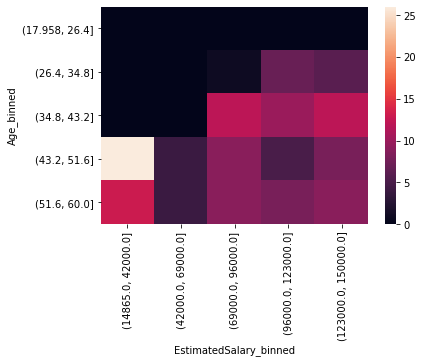

In [22]:
sns.heatmap(heat)

# Correlation

In [25]:
data = pd.read_excel("Folds5x2_pp.xlsx")

In [26]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [32]:
corr = data.corr()
corr

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:>

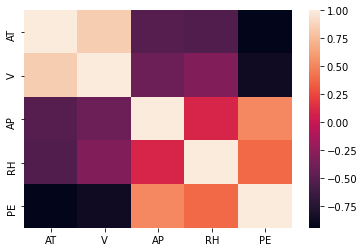

In [33]:
sns.heatmap(corr)

In [28]:
from scipy.stats import pearsonr

pearsonr(data["AT"],data["PE"])

(-0.9481284704167594, 0.0)

C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AT', ylabel='PE'>

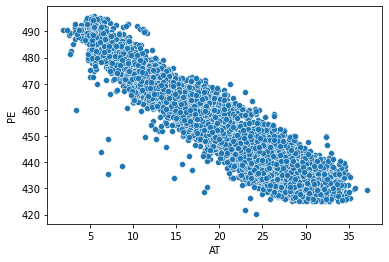

In [29]:
sns.scatterplot(data["AT"],data["PE"])